In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfs = []

sec_id = "tcsg"
date_from = "2020-01-01"
date_to = "2024-10-31"
url = f"https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{sec_id}/candles.html?from={date_from}&till={date_to}"

retrieved = 0
while True:
    df, cursor = pd.read_html(url + f"&start={retrieved}")
    dfs.append(df)
    retrieved += cursor.at[0, "PAGESIZE (int64)"]
    total = cursor.at[0, "TOTAL (int64)"]
    if retrieved >= total:
        break

df = pd.concat(dfs, axis=0, ignore_index=True)
q = pd.to_datetime(df['TRADEDATE (date:10)'])
df

,BOARDID (string:12),TRADEDATE (date:10),SHORTNAME (string:189),SECID (string:36),NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),...,MARKETPRICE3 (double),ADMITTEDQUOTE (double),MP2VALTRD (double),MARKETPRICE3TRADESVALUE (double),ADMITTEDVALUE (double),WAVAL (double),TRADINGSESSION (int32),CURRENCYID (string:9),TRENDCLSPR (double),TRADE_SESSION_DATE (date:10)
0,TQBR,2020-01-03,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,3586,1.156614e+08,1317.2,1317.2,1353.0,1332.4,...,1344.4,1332.4,1.156614e+08,1.156614e+08,115661375.8,NaN,3,SUR,1.62,NaN
1,TQBR,2020-01-06,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2497,7.186416e+07,1340.0,1312.0,1349.4,1322.8,...,1321.2,1322.8,7.186416e+07,7.186416e+07,71864157.0,NaN,3,SUR,-0.72,NaN
2,TQBR,2020-01-08,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2191,9.221384e+07,1315.2,1312.4,1350.2,1350.2,...,1334.2,1350.2,9.221384e+07,9.221384e+07,92213837.2,NaN,3,SUR,2.07,NaN
3,TQBR,2020-01-09,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2898,8.827762e+07,1350.2,1333.8,1368.0,1366.8,...,1357.6,1366.8,8.827762e+07,8.827762e+07,88277620.0,NaN,3,SUR,1.23,NaN
4,TQBR,2020-01-10,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,4188,1.012924e+08,1355.2,1355.0,1401.0,1398.4,...,1381.0,1398.4,1.012924e+08,1.012924e+08,101292419.2,NaN,3,SUR,2.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,TQBR,2024-10-25,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,149977,1.706178e+10,2533.5,2395.5,2548.0,2440.0,...,2494.0,NaN,1.300570e+10,1.300570e+10,NaN,0.0,3,SUR,-4.86,NaN
1220,TQBR,2024-10-28,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,134672,1.512732e+10,2375.0,2304.5,2396.0,2323.5,...,2358.0,NaN,1.311936e+10,1.311936e+10,NaN,0.0,3,SUR,-3.59,NaN
1221,TQBR,2024-10-29,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,119134,1.450842e+10,2330.5,2311.5,2406.5,2364.0,...,2340.0,NaN,1.231961e+10,1.231961e+10,NaN,0.0,3,SUR,2.91,NaN
1222,TQBR,2024-10-30,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,103660,1.245921e+10,2398.5,2334.5,2410.5,2378.0,...,2386.5,NaN,9.802668e+09,9.802668e+09,NaN,0.0,3,SUR,-2.05,NaN


In [57]:
print(type(dfs))

<class 'list'>


В таблице, спарсенной с сайта Мосбиржи, содержится информация о торгах акций Т-Банка (в прошлом Тинькофф) на каждый день с 1 января 2020 года по 26 февраля 2025 года, за исключением выходных и праздничных дней.

Что содержится в каждой из колонок таблицы?

0 колонка - индекс

1 колонка (BOARDID) - идентификатор рынка. У нас это TQBR - основноый рынок акций на Мосбирже.

2 колонка (TRADEDATE) - дата торгов.

3 колонка (SHORTNAME) - имя компании (ТКСХолд ао - это ТКС Холдинг, группа, владеющая Т-Банком)

4 колонка (SECID) - тикер Т-Банка (TCSG)

5 колонка (NUMTRADES) - количество сделок за день

6 колонка (VALUE) - денежный объем торгов (цена*количество; суммарная стоимость всех сделок с ценной бумагой за день)

7 колонка (OPEN) - цена открытия

8 колонка (LOW) - минимальная цена

9 колонка (HIGH) - максимальная цена

10 колонка (LEGALCLOSEPRICE) - официальная цена закрытия

11 колонка (WAPRICE) - средневзвешенная цена

12 колонка (CLOSE) - фактическая цена закрытия

13 колонка (VOLUME) - количество акций, проданных или купленных за день

14 колонка (MARKETPRICE2) - рыночная цена 2

15 колонка (MARKETPRICE3) - рыночная цена 3

16 колонка (ADMITTEDQUOTE) - признаваемая котировка

17 колонка (MP2VALTRD) - объём сделок для расчёта рыночной цены

18 колонка (MARKETPRICE3TRADESVALUE) - значение рыночной цены 3 по итогам торгового дня

19 колонка (ADMITTEDVALUE) -  объём сделок для расчёта признаваемой котировки

20 колонка (WAVAL) - средневзвешенная стоимость актива, рассчитанная на основе объема торгов

21 колонка (TRADINGSESSION) - идентификатор торговой сессии

22 колонка (CURRENCYID) - индкентификатор валюты - рубль.

23 колонка (TRENDCLSPR) - индикатор тренда, разница между текущей ценой закрытия и предыдущей ценой закрытия, выраженная в процентах

In [4]:
nulls = df.isnull().sum(axis = 0)
print(nulls)

a = df['TRADEDATE (date:10)'][(df['OPEN (double)'].isnull() == True) | (df['LOW (double)'].isnull() == True) | (df['HIGH (double)'].isnull() == True) | (df['WAPRICE (double)'].isnull() == True) | (df['CLOSE (double)'].isnull() == True) | (df['TRENDCLSPR (double)'].isnull() == True)]
an = a.to_numpy()

b = df['TRADEDATE (date:10)'][(df['ADMITTEDQUOTE (double)'].isnull() == True) | (df['ADMITTEDVALUE (double)'].isnull() == True)]
bn = b.to_numpy()

c = df['TRADEDATE (date:10)'][df['MARKETPRICE2 (double)'].isnull() == True]
cn = c.to_numpy()

d = df['TRADEDATE (date:10)'][df['WAVAL (double)'].isnull() == True]
dn = d.to_numpy()


BOARDID (string:12)                    0
TRADEDATE (date:10)                    0
SHORTNAME (string:189)                 0
SECID (string:36)                      0
NUMTRADES (double)                     0
VALUE (double)                         0
OPEN (double)                         40
LOW (double)                          40
HIGH (double)                         40
LEGALCLOSEPRICE (double)               0
WAPRICE (double)                      40
CLOSE (double)                        40
VOLUME (double)                        0
MARKETPRICE2 (double)                 20
MARKETPRICE3 (double)                  0
ADMITTEDQUOTE (double)               458
MP2VALTRD (double)                     0
MARKETPRICE3TRADESVALUE (double)       0
ADMITTEDVALUE (double)               458
WAVAL (double)                       115
TRADINGSESSION (int32)                 0
CURRENCYID (string:9)                  0
TRENDCLSPR (double)                   40
TRADE_SESSION_DATE (date:10)        1224
dtype: int64


In [5]:
cond = df['TRADEDATE (date:10)'].isin(a)
df['Были ли торги'] = np.where(cond, 'нет', 'да')
df['Разброс цен'] = df['HIGH (double)'] - df['LOW (double)']
df['Категория по средневзвешенной цене'] = pd.qcut(df['WAPRICE (double)'], q = 3, labels = ['low', 'medium', 'high'])
df['Прирост количества торгуемых акций'] = df['VOLUME (double)'].diff() / df['VOLUME (double)'].shift()
df['Доходность по средневзвешенной цене'] = df['WAPRICE (double)'].diff() / df['WAPRICE (double)'].shift()
df['Прирост количества сделок'] = df['NUMTRADES (double)'].diff() / df['NUMTRADES (double)'].shift()
df

,BOARDID (string:12),TRADEDATE (date:10),SHORTNAME (string:189),SECID (string:36),NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),...,TRADINGSESSION (int32),CURRENCYID (string:9),TRENDCLSPR (double),TRADE_SESSION_DATE (date:10),Были ли торги,Разброс цен,Категория по средневзвешенной цене,Прирост количества торгуемых акций,Доходность по средневзвешенной цене,Прирост количества сделок
0,TQBR,2020-01-03,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,3586,1.156614e+08,1317.2,1317.2,1353.0,1332.4,...,3,SUR,1.62,NaN,да,35.8,low,NaN,NaN,NaN
1,TQBR,2020-01-06,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2497,7.186416e+07,1340.0,1312.0,1349.4,1322.8,...,3,SUR,-0.72,NaN,да,37.4,low,-0.367784,-0.017257,-0.303681
2,TQBR,2020-01-08,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2191,9.221384e+07,1315.2,1312.4,1350.2,1350.2,...,3,SUR,2.07,NaN,да,37.8,low,0.270563,0.009991,-0.122547
3,TQBR,2020-01-09,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2898,8.827762e+07,1350.2,1333.8,1368.0,1366.8,...,3,SUR,1.23,NaN,да,34.2,low,-0.059093,0.017386,0.322684
4,TQBR,2020-01-10,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,4188,1.012924e+08,1355.2,1355.0,1401.0,1398.4,...,3,SUR,2.31,NaN,да,46.0,low,0.127916,0.017236,0.445135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,TQBR,2024-10-25,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,149977,1.706178e+10,2533.5,2395.5,2548.0,2440.0,...,3,SUR,-4.86,NaN,да,152.5,low,0.783189,-0.013750,0.732276
1220,TQBR,2024-10-28,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,134672,1.512732e+10,2375.0,2304.5,2396.0,2323.5,...,3,SUR,-3.59,NaN,да,91.5,low,-0.067471,-0.049101,-0.102049
1221,TQBR,2024-10-29,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,119134,1.450842e+10,2330.5,2311.5,2406.5,2364.0,...,3,SUR,2.91,NaN,да,95.0,low,-0.038278,-0.002975,-0.115377
1222,TQBR,2024-10-30,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,103660,1.245921e+10,2398.5,2334.5,2410.5,2378.0,...,3,SUR,-2.05,NaN,да,76.0,low,-0.153239,0.014280,-0.129887


In [18]:
jk = df.drop(columns = ['BOARDID (string:12)', 'TRADEDATE (date:10)', 'SHORTNAME (string:189)', 'SECID (string:36)', 'WAVAL (double)', 'TRADINGSESSION (int32)', 'CURRENCYID (string:9)', 'TRADE_SESSION_DATE (date:10)', 'Были ли торги', 'Категория по средневзвешенной цене'])
nk = jk.columns
stat = dict()
stat['Показатель'] = ['среднее', 'медиана', '25% квантиль', '50% квантиль', '75% квантиль', 'минимум', 'максимум', 'ст. откл.']
for el in nk:
    stat[el] = [df[el].mean(), df[el].median(), df[el].quantile(q = 0.25), df[el].quantile(q = 0.5), df[el].quantile(q = 0.75), df[el].min(), df[el].max(), df[el].std()]
framestat = pd.DataFrame(stat)
framestat

c:\Users\Huaweii\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Huaweii\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Показатель,NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),WAPRICE (double),CLOSE (double),VOLUME (double),...,MARKETPRICE3 (double),ADMITTEDQUOTE (double),MP2VALTRD (double),MARKETPRICE3TRADESVALUE (double),ADMITTEDVALUE (double),TRENDCLSPR (double),Разброс цен,Прирост количества торгуемых акций,Доходность по средневзвешенной цене,Прирост количества сделок
0,среднее,29889.259804,1.934891e+09,3249.444595,3171.046959,3315.675253,3242.127533,3243.742821,3244.918243,6.111789e+05,...,3245.739951,3385.343473,1.845811e+09,1.722046e+09,1.454002e+09,0.104975,144.628294,inf,0.001307,inf
1,медиана,22734.000000,1.051546e+09,2786.250000,2721.000000,2840.250000,2875.500000,2779.250000,2779.250000,3.312845e+05,...,2871.750000,2602.000000,9.897515e+08,9.361942e+08,7.571495e+08,0.020000,97.000000,-0.029307,0.000279,-0.019659
2,25% квантиль,13531.250000,4.730997e+08,2292.850000,2222.150000,2348.500000,2318.850000,2290.950000,2288.450000,2.012192e+05,...,2318.750000,1869.700000,4.636858e+08,4.355390e+08,4.005150e+08,-1.340000,60.500000,-0.287863,-0.012819,-0.254897
3,50% квантиль,22734.000000,1.051546e+09,2786.250000,2721.000000,2840.250000,2875.500000,2779.250000,2779.250000,3.312845e+05,...,2871.750000,2602.000000,9.897515e+08,9.361942e+08,7.571495e+08,0.020000,97.000000,-0.029307,0.000279,-0.019659
4,75% квантиль,37246.750000,2.259729e+09,3539.250000,3472.500000,3587.250000,3514.250000,3525.625000,3529.250000,6.054870e+05,...,3507.750000,4768.950000,2.164509e+09,2.056326e+09,1.685654e+09,1.642500,176.850000,0.399167,0.015123,0.328213
5,минимум,0.000000,0.000000e+00,836.200000,810.000000,860.600000,831.800000,839.000000,831.800000,0.000000e+00,...,838.800000,831.800000,0.000000e+00,5.032000e+05,0.000000e+00,-32.280000,12.000000,-1.000000,-0.161542,-1.000000
6,максимум,440874.000000,4.904654e+10,8400.000000,8005.000000,8518.400000,8360.600000,8342.600000,8345.000000,1.540049e+07,...,8342.800000,8360.600000,4.735647e+10,4.735647e+10,2.963233e+10,21.560000,2327.000000,inf,0.192976,inf
7,ст. откл.,29494.743255,3.020867e+09,1624.289894,1584.043664,1657.539692,1594.670456,1618.434620,1620.244206,9.870495e+05,...,1594.418225,1982.467751,2.979240e+09,2.752820e+09,2.251166e+09,3.317707,144.400033,NaN,0.028687,NaN


In [19]:
jk.corr()

,NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),WAPRICE (double),CLOSE (double),VOLUME (double),MARKETPRICE2 (double),MARKETPRICE3 (double),ADMITTEDQUOTE (double),MP2VALTRD (double),MARKETPRICE3TRADESVALUE (double),ADMITTEDVALUE (double),TRENDCLSPR (double),Разброс цен,Прирост количества торгуемых акций,Доходность по средневзвешенной цене,Прирост количества сделок
NUMTRADES (double),1.000000,0.903567,0.123847,0.103804,0.136645,0.117978,0.118916,0.118896,0.878691,0.116942,0.114974,0.276047,0.780042,0.889799,0.473885,-0.092623,0.429811,0.211903,0.023394,0.249812
VALUE (double),0.903567,1.000000,0.196999,0.187525,0.205806,0.195906,0.196566,0.196073,0.953672,0.195465,0.194176,0.488425,0.892180,0.994383,0.691931,-0.036896,0.305286,0.175743,0.015429,0.142845
OPEN (double),0.123847,0.196999,1.000000,0.997817,0.998713,0.997337,0.998446,0.997633,-0.029574,0.998345,0.998345,0.997430,0.188607,0.188607,0.488305,-0.042079,0.518147,-0.026965,-0.022943,-0.018335
LOW (double),0.103804,0.187525,0.997817,1.000000,0.997058,0.998742,0.999239,0.998647,-0.036963,0.999272,0.999272,0.998871,0.181149,0.181149,0.472606,-0.001161,0.475203,-0.031088,0.004837,-0.024873
HIGH (double),0.136645,0.205806,0.998713,0.997058,1.000000,0.998464,0.999018,0.998660,-0.023465,0.998885,0.998885,0.998551,0.197295,0.197295,0.505179,-0.014936,0.541250,-0.016149,0.005063,-0.006596
LEGALCLOSEPRICE (double),0.117978,0.195906,0.997337,0.998742,0.998464,1.000000,0.999631,0.999788,-0.029328,0.999484,0.999211,1.000000,0.173226,0.188979,0.360245,0.015814,0.505136,-0.023218,0.020756,-0.016948
WAPRICE (double),0.118916,0.196566,0.998446,0.999239,0.999018,0.999631,1.000000,0.999594,-0.030583,0.999976,0.999976,0.999654,0.189285,0.189285,0.489002,-0.000089,0.506048,-0.022395,0.011335,-0.014675
CLOSE (double),0.118896,0.196073,0.997633,0.998647,0.998660,0.999788,0.999594,1.000000,-0.030824,0.999467,0.999467,0.999807,0.188982,0.188982,0.488444,0.015597,0.508433,-0.020889,0.020355,-0.013296
VOLUME (double),0.878691,0.953672,-0.029574,-0.036963,-0.023465,-0.029328,-0.030583,-0.030824,1.000000,-0.030601,-0.031084,0.108983,0.851690,0.949604,0.589054,-0.039493,0.136125,0.185572,0.013036,0.150369
MARKETPRICE2 (double),0.116942,0.195465,0.998345,0.999272,0.998885,0.999484,0.999976,0.999467,-0.030601,1.000000,0.999731,0.999514,0.174613,0.188335,0.363043,-0.000193,0.504158,-0.024528,0.010548,-0.017784


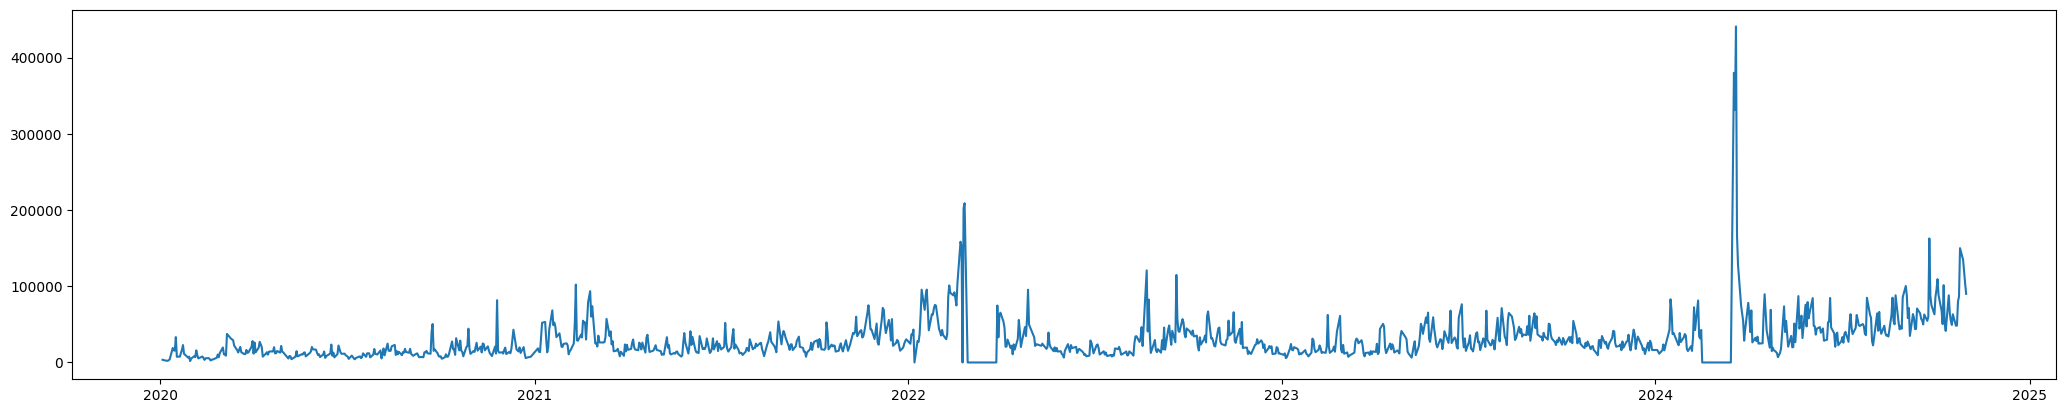

In [33]:
# import matplotlib.dates as mdates
plt.figure(figsize=(25.6, 4.8))
plt.plot(q, df["NUMTRADES (double)"])

plt.show()

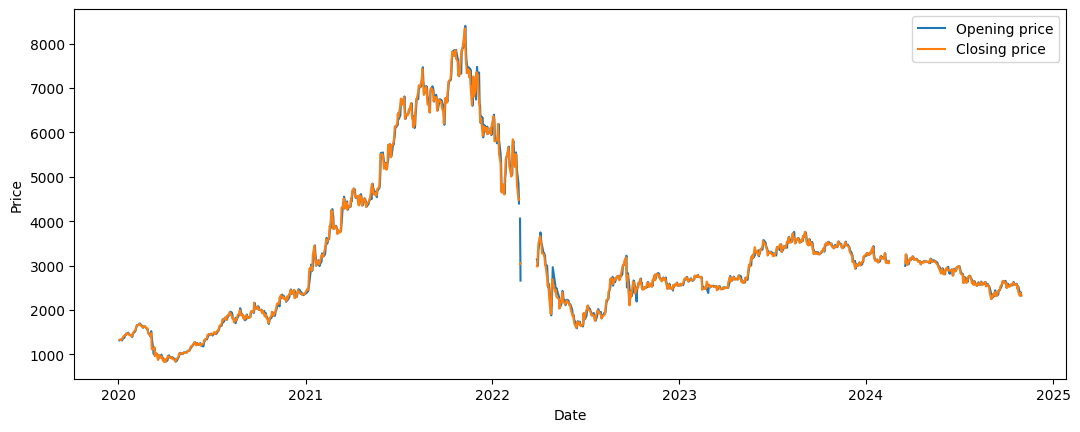

In [32]:

plt.figure(figsize=(12.8, 4.8))
plt.plot(q, df["OPEN (double)"], label="Opening price")
plt.plot(q, df["CLOSE (double)"], label="Closing price")
#plt.plot(df_before_split.index, df_before_split["HIGH (double)"], label="Highest price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

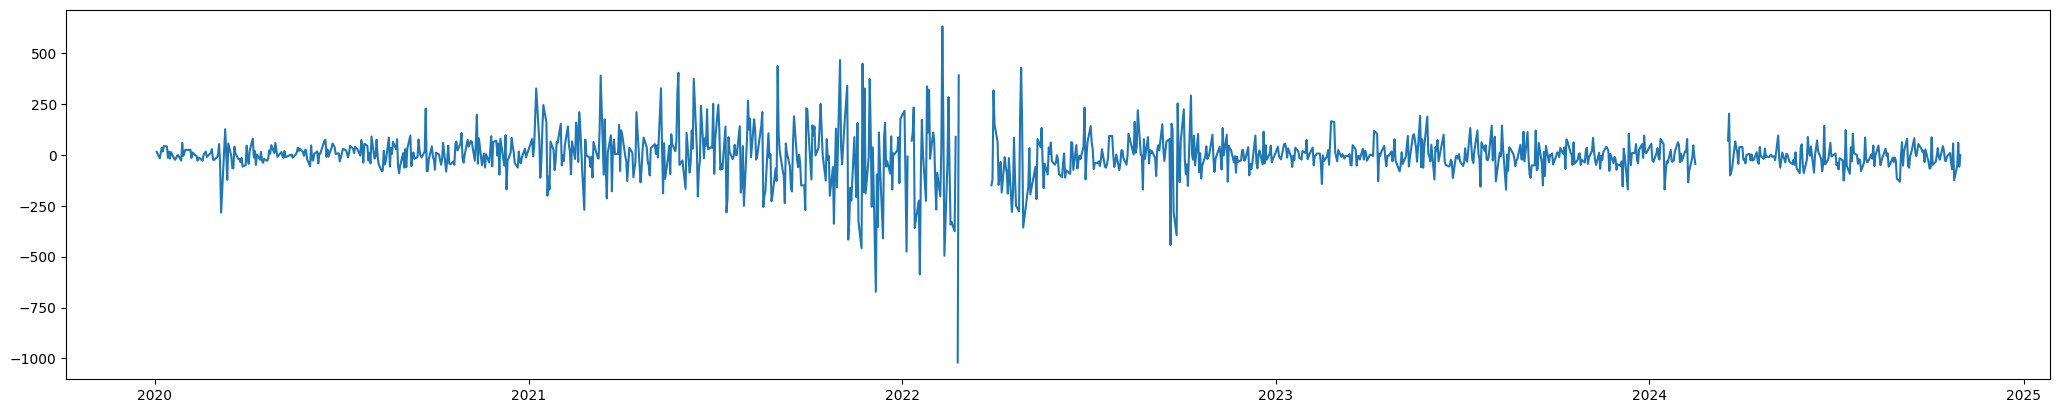

In [34]:
close_open_delta = df["CLOSE (double)"] - df["OPEN (double)"]
plt.figure(figsize=(25.6, 4.8))
plt.plot(q, close_open_delta)
plt.show()

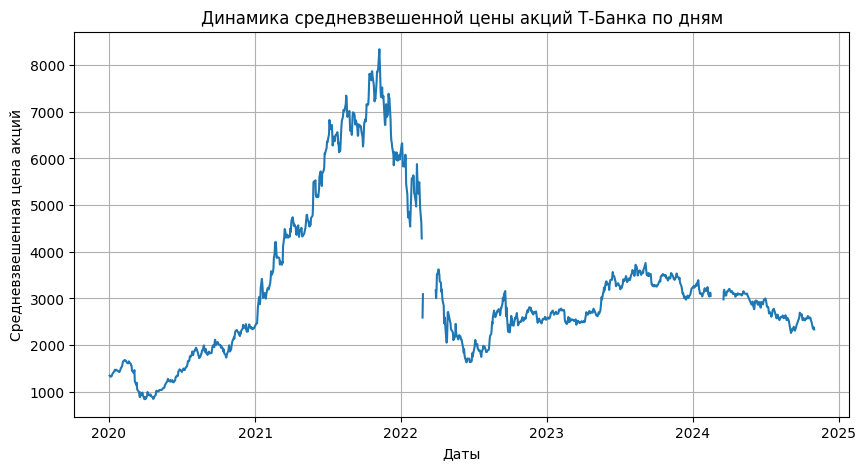

In [ ]:
plt.figure(figsize = (10, 5))

plt.plot(q, df['WAPRICE (double)'])
plt.grid()
plt.title('Динамика средневзвешенной цены акций Т-Банка по дням')
plt.xlabel('Даты')
plt.ylabel('Средневзвешенная цена акций')
plt.show()



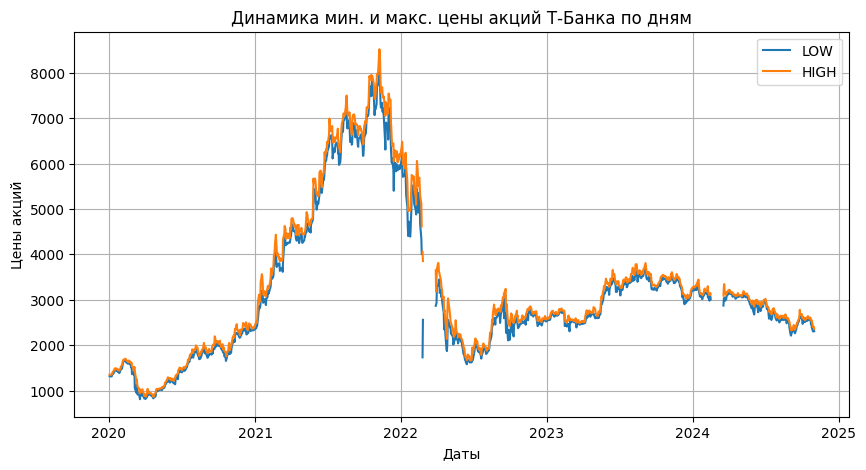

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(q, df['LOW (double)'], label = 'LOW')
plt.plot(q, df['HIGH (double)'], label = 'HIGH' )
plt.grid()
plt.legend()
plt.title('Динамика мин. и макс. цены акций Т-Банка по дням')
plt.xlabel('Даты')
plt.ylabel('Цены акций')
plt.show()


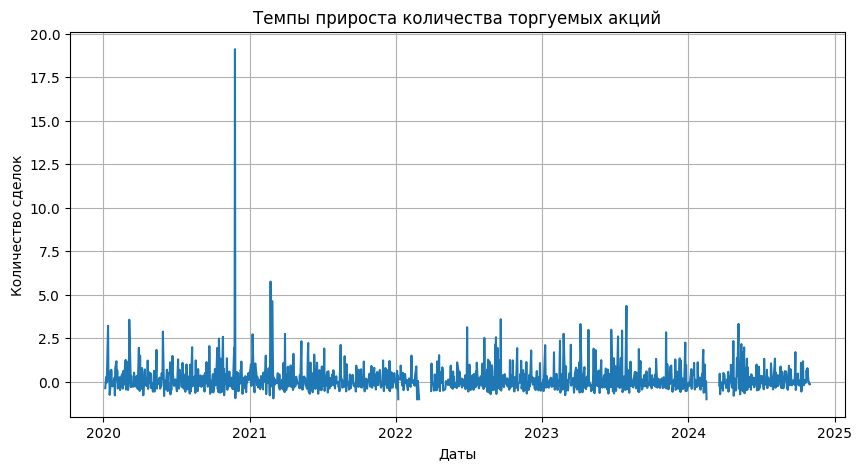

In [9]:
plt.figure(figsize = (10, 5))
plt.plot(q, df['Прирост количества торгуемых акций'])
plt.grid()
plt.title('Темпы прироста количества торгуемых акций')
plt.xlabel('Даты')
plt.ylabel('Количество сделок')
plt.show()


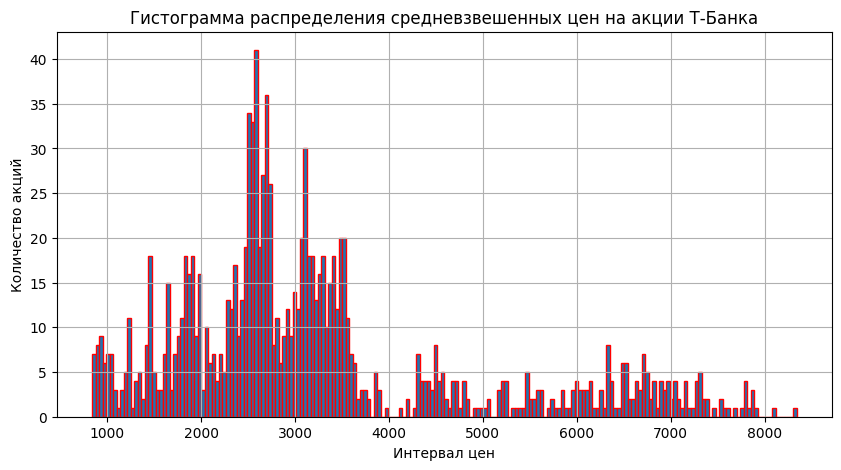

In [10]:
plt.figure(figsize = (10, 5))
plt.hist(df['WAPRICE (double)'], bins = 200, edgecolor = 'red')
plt.grid()
plt.title('Гистограмма распределения средневзвешенных цен на акции Т-Банка')
plt.xlabel('Интервал цен')
plt.ylabel('Количество акций')
plt.show()


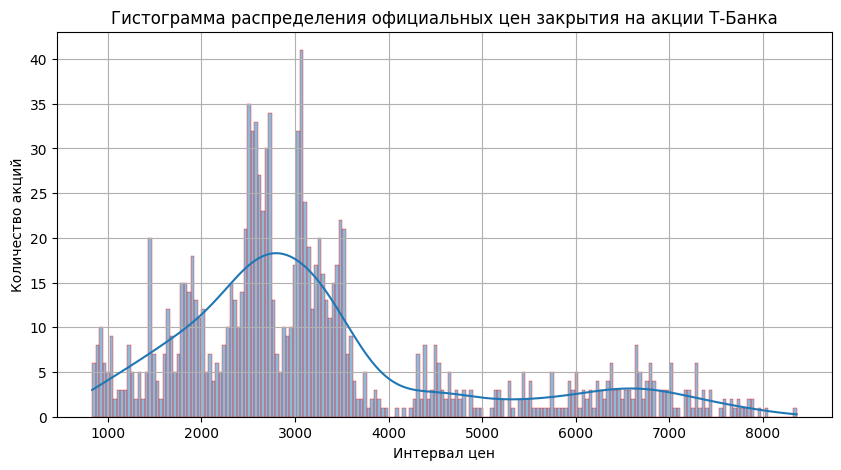

In [11]:
plt.figure(figsize = (10, 5))
sns.histplot(df['LEGALCLOSEPRICE (double)'], bins = 200, edgecolor = 'red', kde = True)
plt.grid()
plt.title('Гистограмма распределения официальных цен закрытия на акции Т-Банка')
plt.xlabel('Интервал цен')
plt.ylabel('Количество акций')
plt.show()


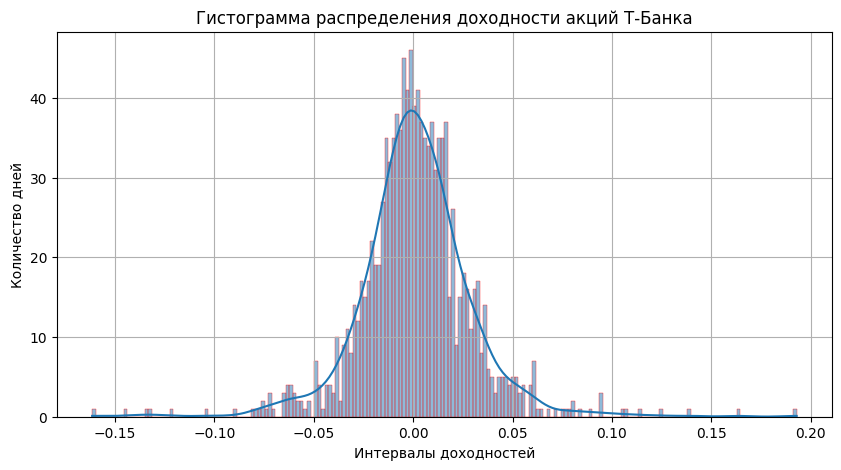

In [12]:
plt.figure(figsize = (10, 5))
sns.histplot(df['Доходность по средневзвешенной цене'], bins = 200, edgecolor = 'red', kde = True)
plt.grid()
plt.title('Гистограмма распределения доходности акций Т-Банка')
plt.xlabel('Интервалы доходностей')
plt.ylabel('Количество дней')
plt.show()

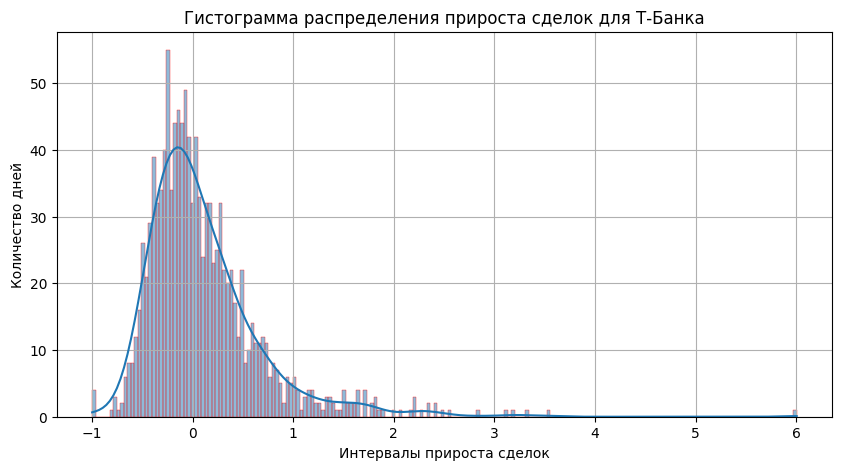

In [13]:


plt.figure(figsize = (10, 5))
sns.histplot(df['Прирост количества сделок'], bins = 200, edgecolor = 'red', kde = True)
plt.grid()
plt.title('Гистограмма распределения прироста сделок для Т-Банка')
plt.xlabel('Интервалы прироста сделок')
plt.ylabel('Количество дней')
plt.show()